/tmp/ipykernel_1141208/114129778.py:27: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  print(plt.cm.get_cmap('hsv', len(verbs)).__dict__)
/tmp/ipykernel_1141208/114129778.py:28: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  inner_colors = list(plt.cm.get_cmap('hsv', len(verbs))._segmentdata.keys())


{'monochrome': False, 'name': 'hsv', 'N': 5, '_rgba_bad': (0.0, 0.0, 0.0, 0.0), '_rgba_under': None, '_rgba_over': None, '_i_under': 5, '_i_over': 6, '_i_bad': 7, '_isinit': False, 'colorbar_extend': False, '_segmentdata': {'red': ((0.0, 1.0, 1.0), (0.15873, 1.0, 1.0), (0.174603, 0.96875, 0.96875), (0.333333, 0.03125, 0.03125), (0.349206, 0.0, 0.0), (0.666667, 0.0, 0.0), (0.68254, 0.03125, 0.03125), (0.84127, 0.96875, 0.96875), (0.857143, 1.0, 1.0), (1.0, 1.0, 1.0)), 'green': ((0.0, 0.0, 0.0), (0.15873, 0.9375, 0.9375), (0.174603, 1.0, 1.0), (0.507937, 1.0, 1.0), (0.666667, 0.0625, 0.0625), (0.68254, 0.0, 0.0), (1.0, 0.0, 0.0)), 'blue': ((0.0, 0.0, 0.0), (0.333333, 0.0, 0.0), (0.349206, 0.0625, 0.0625), (0.507937, 1.0, 1.0), (0.84127, 1.0, 1.0), (0.857143, 0.9375, 0.9375), (1.0, 0.09375, 0.09375))}, '_gamma': 1.0}


ValueError: Invalid RGBA argument: ['r', 'e', 'd', 0.5]

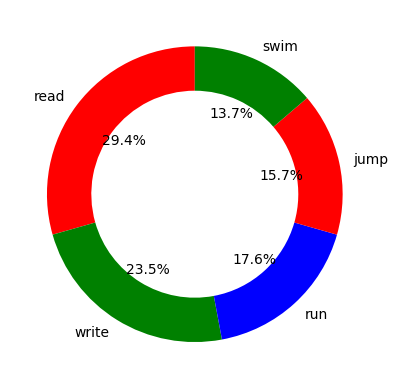

In [7]:
import matplotlib.pyplot as plt
import numpy as np

# 假设这是从1000条指令中统计得到的数据
verbs = {
    'read': 150,
    'write': 120,
    'run': 90,
    'jump': 80,
    'swim': 70,
}

nouns_per_verb = {
    'read': {'book': 100, 'article': 50},
    'write': {'note': 60, 'essay': 60},
    'run': {'fast': 45, 'slow': 45},
    'jump': {'high': 40, 'low': 40},
    'swim': {'far': 35, 'near': 35},
}

# 计算总的根动词出现次数
total_verbs = sum(verbs.values())

# 准备数据绘制内层饼图
inner_sizes = [verbs[verb] / total_verbs * 100 for verb in verbs]
inner_labels = list(verbs.keys())
print(plt.cm.get_cmap('hsv', len(verbs)).__dict__)
inner_colors = list(plt.cm.get_cmap('hsv', len(verbs))._segmentdata.keys())

# 准备数据绘制外层环状图
outer_sizes = []
outer_labels = []
outer_colors = []

for verb, count in verbs.items():
    noun_count = nouns_per_verb[verb]
    total_noun_count = sum(noun_count.values())
    noun_percentages = [noun_count / total_noun_count * 100 for noun_count in noun_count.values()]
    outer_sizes.extend(noun_percentages)
    outer_labels.extend([f"{noun} ({p:.1f}%)" for noun, p in noun_count.items()])
    # 为每个根动词的外层饼图设置颜色，比内层颜色浅一些
    for color in inner_colors:
        outer_colors.append([color[0], color[1], color[2], 0.5])  # 调整透明度

# 创建饼状图
fig, ax = plt.subplots()

# 绘制内层饼图
wedges = ax.pie(inner_sizes, labels=inner_labels, autopct='%1.1f%%', startangle=90,
                  colors=inner_colors, wedgeprops=dict(width=0.3))

# 绘制外层环状图
ax.pie(outer_sizes, radius=1.3, colors=outer_colors, startangle=90, labeldistance=1.35,
        wedgeprops=dict(width=0.3), frame=False)

# 绘制一个白色的圆圈在最外层，覆盖掉外层饼图的中心部分
circle = plt.Circle((0, 0), 0.65, color='white', linewidth=0, fill=True)
ax.add_artist(circle)

# 设置图形标题
plt.title('Distribution of Root Verbs and First Direct Nouns')

# 显示图形
plt.show()